In [246]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

### 1. Importing data

In [332]:
df = pd.read_csv("Bengaluru_House_Data.csv")
print("The df's shape is", df.shape)
df.head()

The df's shape is (13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### 2. Data manipulation

In [333]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [334]:
df2 = df.drop(['area_type', 'society', 'balcony', 'availability'],axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [335]:
# As the empty cells are not too many and the dataset is medium size, they will be dropped
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [336]:
df3 = df2.dropna()
df3.shape

(13246, 5)

In [337]:
# BHK and Bedroom are the same, will proceed to make the data uniform
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [345]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [346]:
bhk = []
for row in df3['size']:
    number = row.split()[0]
    bhk.append(number)

In [347]:
df3['BHK'] = bhk
df3['BHK'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [348]:
df3['BHK'].dtypes
df3['BHK'] = df3['BHK'].astype('int')
df3['bath'] = df3['bath'].astype('int')

In [349]:
print("Houses that have more than 20 rooms")
df3[df3.BHK>20]

Houses that have more than 20 rooms


,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27,230.0,27
4684,Munnekollal,43 Bedroom,2400,40,660.0,43


In [350]:
df3.groupby('BHK')['BHK'].agg('count')

BHK
1      649
2     5527
3     4832
4     1395
5      353
6      221
7      100
8       89
9       54
10      14
11       4
12       1
13       1
14       1
16       1
18       1
19       1
27       1
43       1
Name: BHK, dtype: int64

In [351]:
df3.total_sqft.unique()
# we can observe ranges of values... are there any other possibilities than just numbers/ranges?

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [352]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5,120.00,4
2,Uttarahalli,3 BHK,1440,2,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3,95.00,3
4,Kothanur,2 BHK,1200,2,51.00,2


In [357]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [358]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4


In [361]:
df4["price_per_sqft"] = df4["price"]*100000/df4["total_sqft"]
df4.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250.000000


In [362]:
#dimention issues, too many locations
df4 = df4.dropna()
df4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [363]:
for row in df4['location']:
    if not(isinstance(row, str)):
        print(row)

In [364]:
# multiple values from the index column where skipped 
df4 = df4.reset_index(drop=True)

In [365]:
for i in range(len(df4)-1):
    locatiion = df4['location'][i]
    df4.at[i, 'location'] = locatiion.strip()
    

In [366]:
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [367]:
# NOTE: THIS IS THE SAME AS A FOR LOOP
location_stats_less_10 = location_stats[location_stats<=10]
len(location_stats_less_10)

1047

In [368]:
location_stats_less_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [369]:
# converting those 1047 into "other"
for i in range(len(df4['location'])-1):
    if df4['location'][i] in location_stats_less_10:
         df4.at[i, 'location'] = 'other'

In [370]:
df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
# only 241 different locations.

location
other                 2872
Whitefield             533
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         264
                      ... 
Pattandur Agrahara      11
Banjara Layout          11
HAL 2nd Stage           11
Doddaballapur           11
Kodigehalli             11
Name: location, Length: 241, dtype: int64

In [371]:
print(df4.shape)
df4.head()

(13200, 7)


,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250.000000


In [372]:
# Outliers removal
# [Bussiness domain needed] -> there is a relation between the total_sqft of a house and its bhk. 
# It is assumed that there is at least 200sqft per room.
size_totalsqft= df4[df4.total_sqft/df4.BHK<300]
print(len(size_totalsqft))


744


In [373]:
df5 = df4[~(df4.total_sqft/df4.BHK<300)]
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250.000000


In [374]:
df5['price_per_sqft'] = df5['price_per_sqft'].astype('int')

In [375]:
df5.price_per_sqft.describe()
df5.shape

(12456, 7)

In [376]:
# remove outliers for the price_per_sqft based on the standard deviation
df6 = pd.DataFrame()
for location, location_df in df5.groupby('location'):
    mean = np.mean(location_df.price_per_sqft)
    std = np.std(location_df.price_per_sqft)
    reduced_df = location_df[(location_df.price_per_sqft>(mean - std)) & (location_df.price_per_sqft<=(mean + std))]
    df6 = pd.concat([df6,reduced_df], ignore_index = True)

In [377]:
df6.shape

(10243, 7)

In [378]:
# another thing to check is that houses as a maximun have 2 bathrooms more than its amount of BHK... reducing outliers
df7 = df6[(df6.BHK+2 > df6.bath)]
df7.shape

(10149, 7)

In [379]:
df7.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4,428.0,4,15017
1,1st Block Jayanagar,3 BHK,1630.0,3,194.0,3,11901
2,1st Block Jayanagar,3 BHK,1875.0,2,235.0,3,12533
3,1st Block Jayanagar,3 BHK,1200.0,2,130.0,3,10833
4,1st Block Jayanagar,2 BHK,1235.0,2,148.0,2,11983


We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area).For that, we will build a dictionary of stats per bhk, i.e.

{
    '1' :   {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    
   '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    }   }

Now let's remove the 2 BHK apartments whose price_per_sqft < price_per_sqft of 1 BHK apartment

In [380]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

new_df = remove_bhk_outliers(df7)
new_df.shape

(7242, 7)

### 3. Data exploration

In [424]:
locations = new_df.groupby('location')['location'].agg('count').sort_values(ascending=False)
locations

location
other                    1128
Whitefield                239
Sarjapur  Road            186
Electronic City           162
Raja Rajeshwari Nagar     140
                         ... 
2nd Stage Nagarbhavi        4
Banjara Layout              4
Nagasandra                  4
Vishveshwarya Layout        4
Marsur                      3
Name: location, Length: 241, dtype: int64

<AxesSubplot:title={'center':'How many times does each location exist?'}, xlabel='location'>

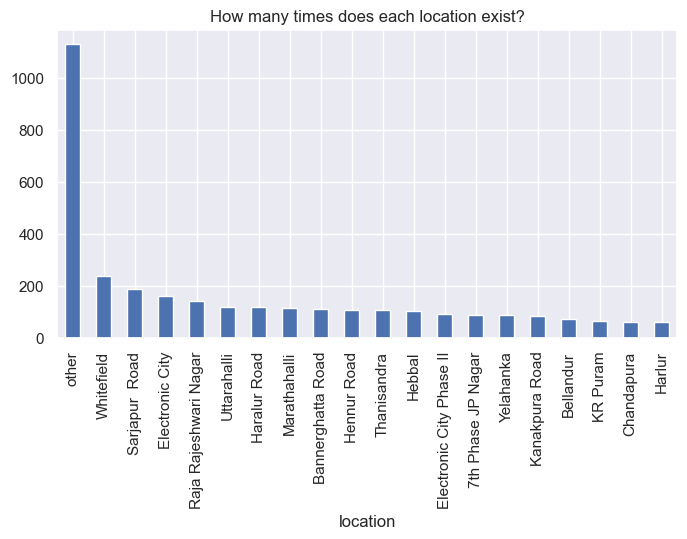

In [425]:
fig = plt.figure(figsize = (8,4))
pd.Series(locations[0:20]).plot(kind='bar', title='How many times does each location exist?')

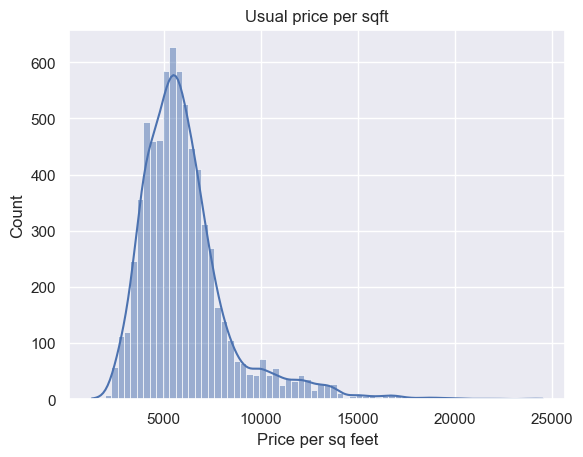

<Figure size 500x200 with 0 Axes>

In [426]:
sns.histplot(data=new_df, x=new_df['price_per_sqft'], bins=70,kde=True).set(title='Usual price per sqft')
plt.xlabel("Price per sq feet")
fig = plt.figure(figsize = (5,2))
sns.set(style="darkgrid")
plt.show()

Text(0, 0.5, 'Count')

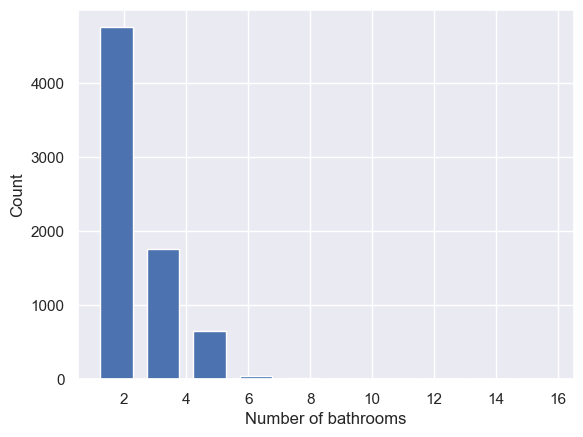

In [427]:
plt.hist(new_df.bath, rwidth=0.7)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

Area types are ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']


<AxesSubplot:>

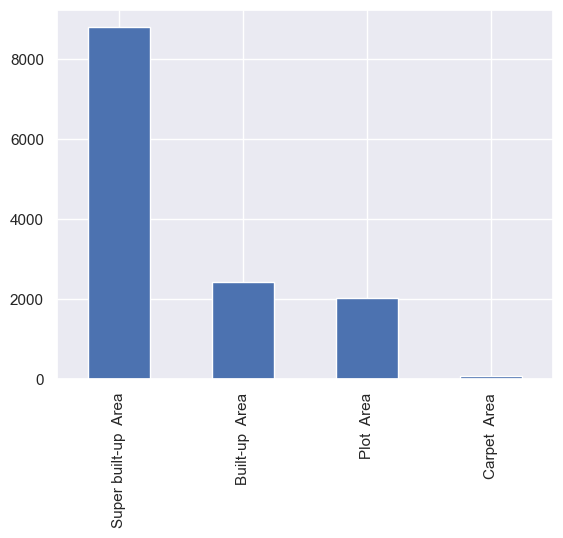

In [428]:
print("Area types are",df['area_type'].unique())
pd.value_counts(df['area_type']).plot.bar()

### 4. Data Preprocessing

In [429]:
dummies = pd.get_dummies(new_df.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [430]:
# if all the locations' values are 0, it is other
df8 = pd.concat([new_df, dummies.drop('other',axis='columns')],axis='columns')
df9 = df8.drop('location', axis='columns')
df9.head()

,size,total_sqft,bath,price,BHK,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4 BHK,2850.0,4,428.0,4,15017,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3 BHK,1630.0,3,194.0,3,11901,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3 BHK,1875.0,2,235.0,3,12533,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3 BHK,1200.0,2,130.0,3,10833,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2 BHK,1235.0,2,148.0,2,11983,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [431]:
for i in df9.columns:
    try:
        df9[[i]] = df9[[i]].astype(float).astype(int)
    except:
        pass

print(df9.dtypes)


size                   object
total_sqft            float64
bath                    int32
price                 float64
BHK                     int32
                       ...   
Yelachenahalli          uint8
Yelahanka               uint8
Yelahanka New Town      uint8
Yelenahalli             uint8
Yeshwanthpur            uint8
Length: 246, dtype: object


In [432]:
# getting the independant variable for training the model
X = df9.drop(['price','size', 'price_per_sqft'], axis = 'columns')
X.head()
X.shape

(7242, 243)

In [433]:
y = df9['price']
y.head()
y.shape

(7242,)

### 5. Training the model

Deciding which model:

In [459]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 10)

In [460]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)


LinearRegression()

In [461]:
print("Score for LinearRegression is ",lr_clf.score(X_test, y_test))

Score for LinearRegression is  0.8614196455097641


In [462]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.86141965, 0.86742626, 0.83232259, 0.78713678, 0.86043442])

Assessment of the model:

In [463]:
def find_best_model(X,y):
    posibilities = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    # cross-validation to randomly shuffle the samples
    cv= ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    # GridSearch to go through the python dictionary to use the different ml models
    for name, config in posibilities.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score= False)
        gs.fit(X,y)
        print(gs.best_score_)
        scores.append({
            'model': name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns= ['model', 'best_score', 'best_params'])

In [464]:
df_possibilities = find_best_model(X, y)
df_possibilities

0.8558781743453568
0.7310671825475964
0.6463693897820587


,model,best_score,best_params
0,linear_regression,0.855878,{'normalize': True}
1,lasso,0.731067,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.646369,"{'criterion': 'mse', 'splitter': 'random'}"


We can observe from the dataset that the model that gives the best accuracy score is the linear_regression. Therefore, that is the model that will be used with a model.score of 0.85.

In [465]:
print("the inputs that the user can give are ", X.columns[0:3], "and the location")


the inputs that the user can give are  Index(['total_sqft', 'bath', 'BHK'], dtype='object') and the location


In [466]:
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 6. Testing the model

In [486]:
def prediction(total_sqft, bath, BHK, location):
    location_index = X.columns.get_loc(location)
    house = np.zeros(len(X.columns))
    house[0] = total_sqft
    house[1] = bath
    house[2] = BHK
    house[location_index] = 1
    # the prediction is an array so we select the first element
    return lr_clf.predict([house])[0]

In [487]:
prediction(2000,4,4,"1st Block Jayanagar")

286.83113262647777

In [488]:
prediction(1000,2,3,"1st Block Jayanagar")

200.88109522770895

In [489]:
prediction(1000,2,3,"1st Phase JP Nagar")

82.16930405717542

In [490]:
prediction(1000,3,3,"1st Phase JP Nagar")

85.92958124302194

In [494]:
y_pred = lr_clf.predict(X_test)

In [498]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,y_pred)
print("The r2 score is" ,r2_score)

The value r2 scope is 0.8614196455097641


Text(0.5, 1.0, 'Actual vs Predicted')

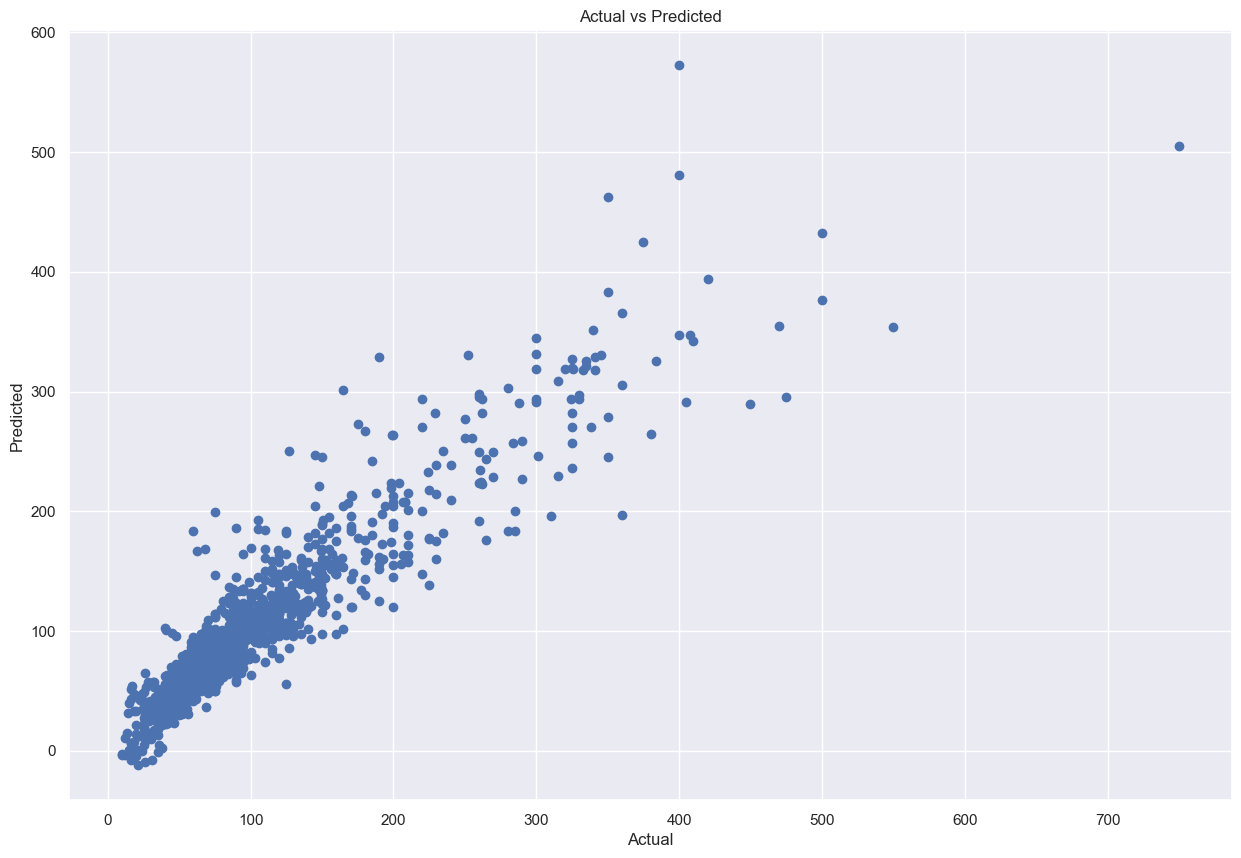

In [501]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

### 7. Exporting the model

In [503]:
import pickle
with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)

In [505]:
import json
columns = [col.lower() for col in X.columns]
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))